In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [97]:
pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 42.2/42.2 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
from statsmode>

SyntaxError: invalid syntax (3269131375.py, line 1)

In [4]:
df = pd.read_csv(r"C:\Users\mei88\OneDrive\桌面\MBAN 6110S-Data Science\assignment1\sales_data.csv")

In [12]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [8]:
df.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [19]:
average_prices = df.groupby("Product")["Price"].mean()

In [20]:
print(average_prices)

Product
Product_1      90.580455
Product_10     67.994706
Product_11     75.495385
Product_12     92.660000
Product_13     88.530000
Product_14    127.857895
Product_15    213.311875
Product_16     99.276316
Product_17     96.292632
Product_18     67.986154
Product_19    123.740000
Product_2     133.226875
Product_20    140.132000
Product_21     91.728667
Product_22    116.490000
Product_23    118.640952
Product_24    109.566923
Product_25    110.250000
Product_26    224.842500
Product_27     78.409286
Product_28     81.148750
Product_29    147.455455
Product_3      59.752000
Product_30    119.600833
Product_31    148.574091
Product_32     90.475000
Product_33     83.993750
Product_34    133.865000
Product_35    138.106250
Product_36     80.066667
Product_37     85.884000
Product_38     73.677143
Product_39    110.200000
Product_4      83.006842
Product_40    141.612273
Product_41    146.960000
Product_42     76.066875
Product_43     62.914000
Product_44     94.071875
Product_45    108

In [22]:
# fillup the NULL cells in 'Price" column with the average price by product type
for index, row in df.iterrows():
    if pd.isnull(row['Price']):
        product = row['Product']
        if product in average_prices:
            df.at[index, 'Price'] = average_prices[product]


In [23]:

print(df)

         Product    Region       Price  Units Sold   Sale Date
0            NaN  Region_6   75.960000        10.0  2022-01-01
1            NaN  Region_1  175.780000         8.0  2022-01-02
2     Product_46  Region_3   20.430000        12.0  2022-01-03
3     Product_36  Region_1   12.770000        10.0  2022-01-04
4     Product_17  Region_6  125.690000         6.0  2022-01-05
...          ...       ...         ...         ...         ...
1045  Product_45  Region_7   78.690000         8.0  2022-07-28
1046   Product_1  Region_6   90.580455         8.0  2022-08-02
1047  Product_17  Region_2  114.370000        11.0  2023-12-18
1048         NaN  Region_8         NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.300000         8.0  2024-02-23

[1050 rows x 5 columns]


In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       1038 non-null   float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [31]:
# I personally think "Unit Sold=Null" is meaningless for my analysis, since no product sold
# remove "units sold" = null cells
df = df.dropna(subset=['Units Sold'], axis=0, inplace=True)


In [36]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049],
      dtype='int64', length=946)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     852 non-null    object 
 1   Region      856 non-null    object 
 2   Price       936 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   946 non-null    object 
 5   Sales       936 non-null    float64
dtypes: float64(3), object(3)
memory usage: 51.7+ KB


In [27]:
#add a column "Sales"
df["Sales"] = df["Price"] *df["Units Sold"]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     852 non-null    object 
 1   Region      856 non-null    object 
 2   Price       936 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   946 non-null    object 
 5   Sales       936 non-null    float64
dtypes: float64(3), object(3)
memory usage: 51.7+ KB


In [39]:
# identify how many null rows for column 'Sales'
df["Sales"].isna().sum()

10

In [40]:
#remove all the rows for "sales" value is missing
df.dropna(subset=['Sales'], axis=0, inplace=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     850 non-null    object 
 1   Region      850 non-null    object 
 2   Price       850 non-null    float64
 3   Units Sold  850 non-null    float64
 4   Sale Date   850 non-null    object 
 5   Sales       850 non-null    float64
dtypes: float64(3), object(3)
memory usage: 46.5+ KB


In [42]:
# fillin missing value in "Region" as "no_region"
df['Region'] = df['Region'].fillna("no_region")

In [41]:
# fillin missing value in "Product" as "Other"
df['Product'] = df['Product'].fillna("Other")

In [44]:
df.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date,Sales
count,936,936,936.000000,936.000000,936,936.000000
unique,51,11,NaN,NaN,891,NaN
top,Other,Region_9,NaN,NaN,2023-04-15,NaN
freq,84,97,NaN,NaN,2,NaN
mean,NaN,NaN,107.246842,10.054487,NaN,1054.440676
std,NaN,NaN,119.711902,3.166371,NaN,1118.562382
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,32.447500,8.000000,NaN,292.200000
50%,NaN,NaN,83.006842,10.000000,NaN,758.840000
75%,NaN,NaN,138.302500,12.000000,NaN,1404.522500


<Axes: xlabel='Region', ylabel='Sales'>

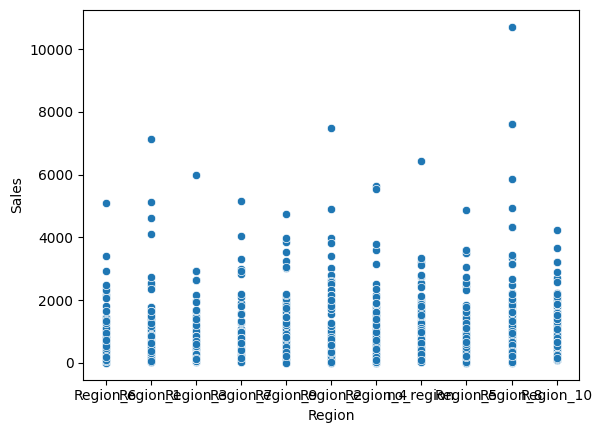

In [45]:
# identify outliers , sales =10716.5
sns.scatterplot(data=df, x="Region", y="Sales")

In [47]:
# drop outliers
df_outliers = df[df['Sales'] >= 10000]

<Axes: xlabel='Region', ylabel='Sales'>

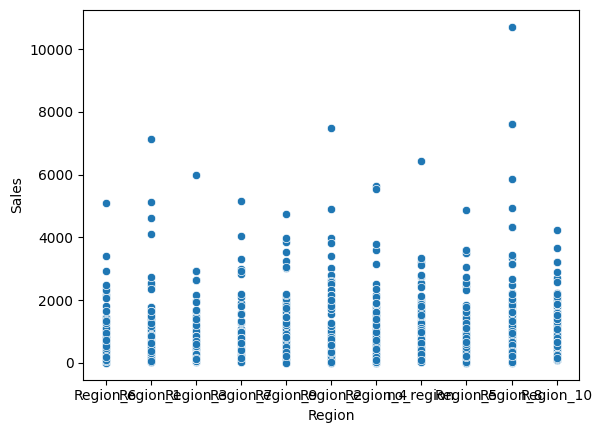

In [49]:
sns.scatterplot(data=df, x="Region", y="Sales")

<Axes: xlabel='Region', ylabel='Sales'>

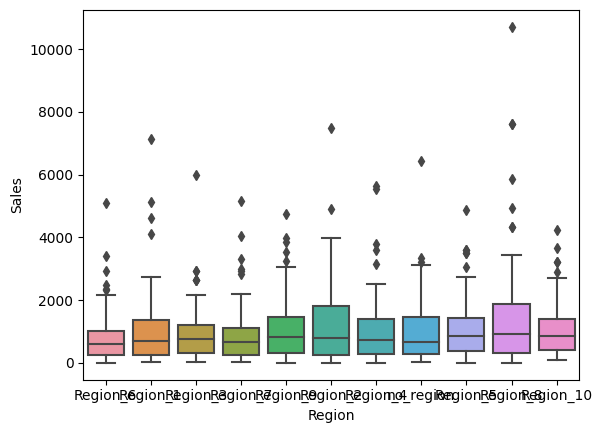

In [48]:
# from the boxplot,  
sns.boxplot(data=df, x="Region", y="Sales")

In [52]:
# I decided to remove the values of "Sales" > 10000.
df.drop(df[df['Sales'] >= 10000].index, inplace=True)

<Axes: xlabel='Region', ylabel='Sales'>

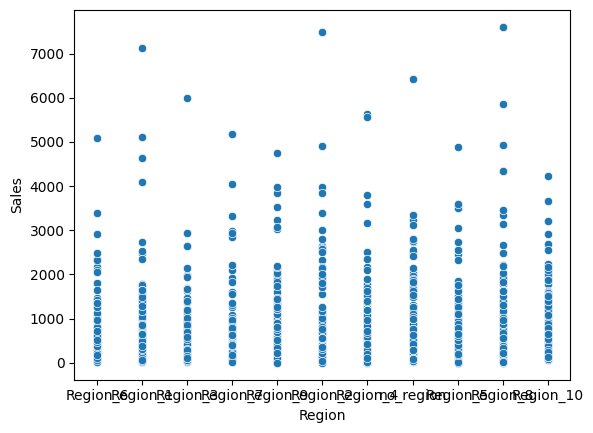

In [53]:
sns.scatterplot(data=df, x="Region", y="Sales")

In [55]:
#create a column called " month " which is extracted from column "sales date"
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df["month"] =  df["Sale Date"].dt.month

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     935 non-null    object        
 1   Region      935 non-null    object        
 2   Price       935 non-null    float64       
 3   Units Sold  935 non-null    float64       
 4   Sale Date   935 non-null    datetime64[ns]
 5   Sales       935 non-null    float64       
 6   month       935 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(2)
memory usage: 54.8+ KB


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

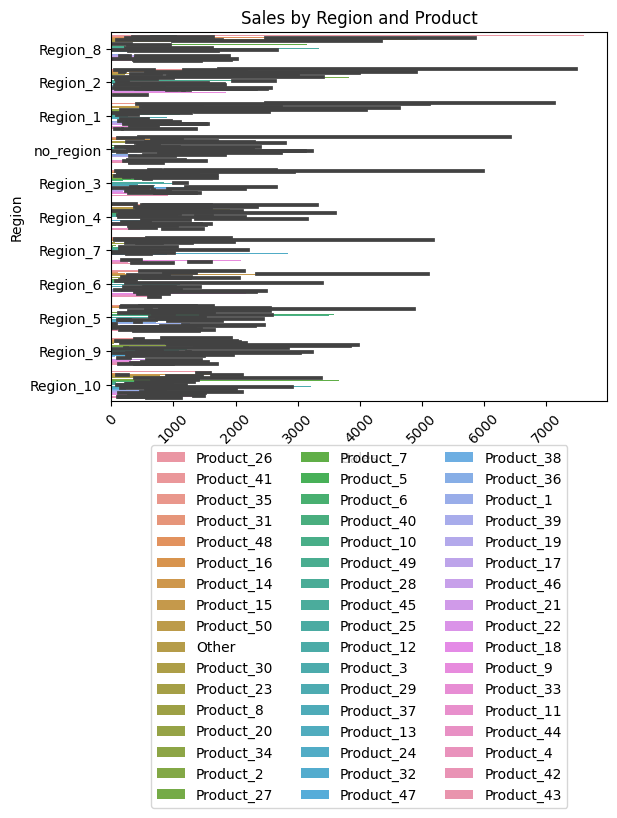

In [73]:
# create visuliazed charts
df_sorted = df.sort_values(by='Sales', ascending=False)
sns.barplot(x='Sales', y='Region', hue='Product', data=df_sorted)
plt.title('Sales by Region and Product')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()

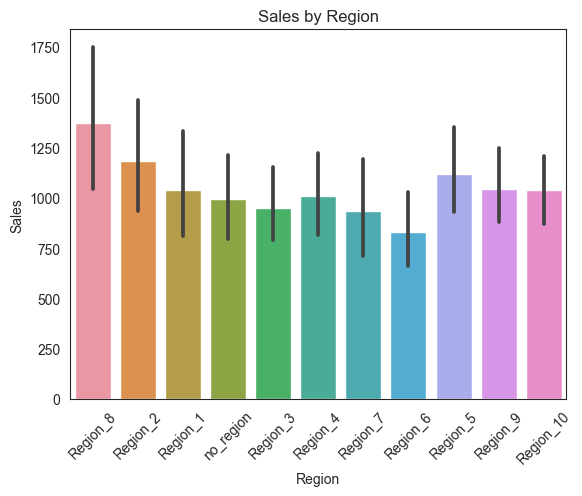

In [84]:
# by region
df_sorted = df.sort_values(by='Sales', ascending=False)
sns.barplot(y='Sales', x='Region', data=df_sorted)
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

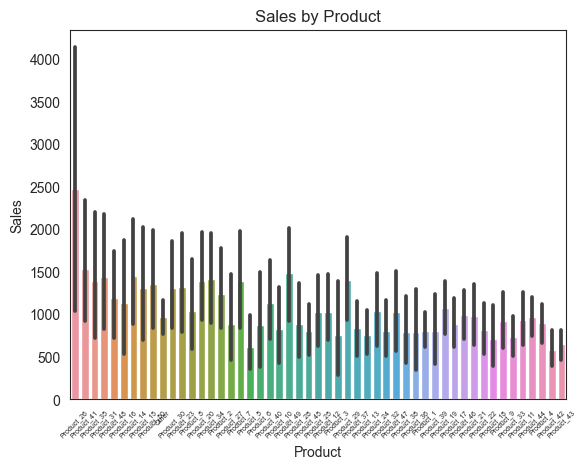

In [92]:
# by product
df_sorted = df.sort_values(by='Sales', ascending=False)
sns.barplot(y='Sales', x='Product', data=df_sorted)
plt.title('Sales by Product')
plt.ylabel('Sales')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.xticks(fontsize=5)
plt.show()

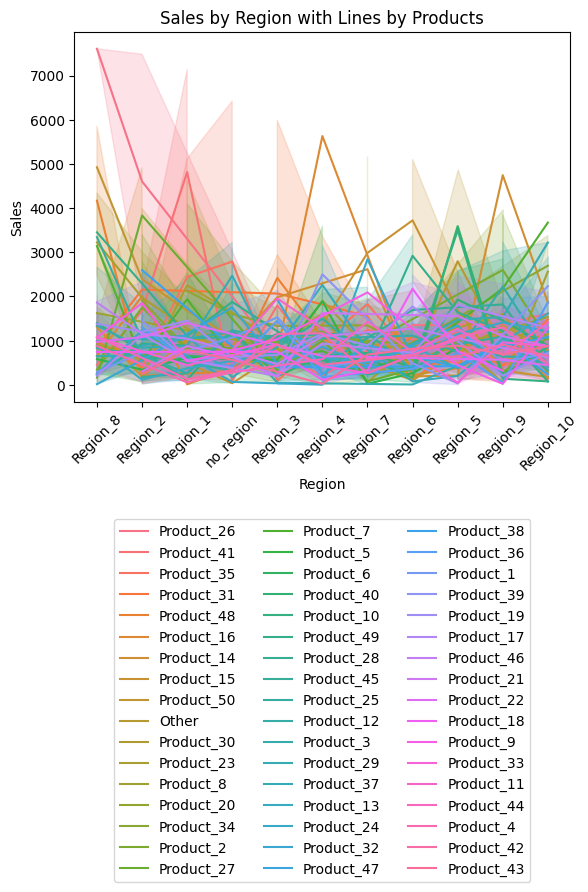

In [78]:
df_sorted = df.sort_values(by='Sales', ascending=False)
sns.lineplot(x='Region', y='Sales', hue='Product', data=df_sorted)
plt.title('Sales by Region with Lines by Products')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

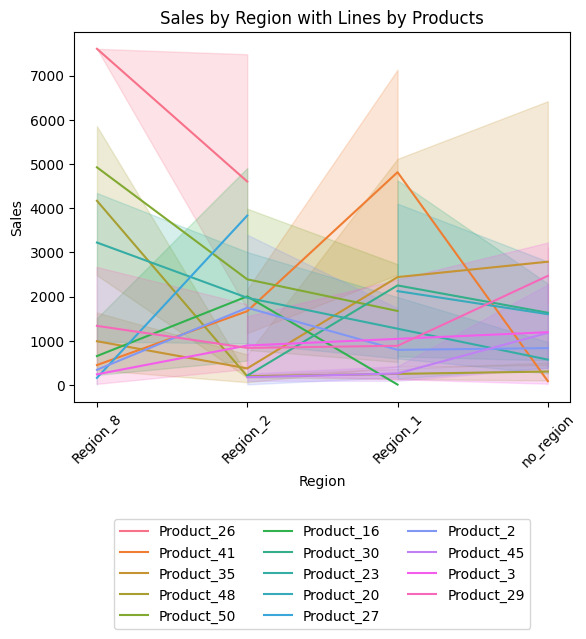

In [79]:
#top 5 products in top 5 regions and last 5 products in last 5 regions
df_sorted = df.sort_values(by='Sales', ascending=False)
top_regions = df_sorted['Region'].head(5).tolist()
top_products = df_sorted[df_sorted['Region'].isin(top_regions)].groupby('Region').head(5)['Product'].tolist()

filtered_df = df_sorted.loc[(df_sorted['Region'].isin(top_regions) & df_sorted['Product'].isin(top_products))]

sns.lineplot(x='Region', y='Sales', hue='Product', data=filtered_df)
plt.title('Sales by Region with Lines by Products')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

In [55]:
df.drop(df[df["Sales"] >= 4000].index, inplace=True)